In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

Random number generators : Inverse Cumulative method

1. Use the random number material to simulate the decay times of a set of 1000 muons in an experimental situation.


2. Estimate the lifetime of the muon from the simulated data set and compare it to the true lifetime


3. Repeat this process 500 times - i.e. create 500 distinct simulated data sets, where each data set represents 1000 muon decays. 

produce a set of 1000 random muon decay times drawn from
such a distribution in the range 0 < t < 10 microsecond

In [3]:
#true value of muon lifetime
tau_true = 2.2

In [75]:
#generate the exponential function of lifetime distributions
def func(t):
    tau = 2.2
    return 1/tau * np.exp(-t/tau)

In [85]:
#generate random lifetimes in exponential distribution
t = []
i=0
#for 1000 muon decays
while i < 1000:
    #random generated from exponential with a mean of 2.2 (true lifetime)
    rand = np.random.exponential(scale=2.2)
    #make list of times, only add on lifetimes for less or equal to 10
    if rand <= 10:
        t.append(rand)
        i+=1

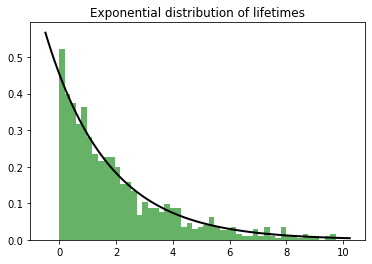

In [79]:
# Plot the histogram of random decay times 
plt.hist(t, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
#here we see it has exponential shape
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = func(x)
plt.plot(x, p, 'k', linewidth=2)
title = "Exponential distribution of lifetimes"

plt.title(title)

plt.show()

In [7]:
#Use the random number material to simulate the decay times of a set of 1000 muons in an experimental situation
#create a function which returns mean tau values for 1000 muon decays
def tau_est():
    t = []
    i=0
    while i < 1000:
        rand = np.random.exponential(scale=2.2)
        if rand <= 10:
            t.append(rand)
            i+=1
    tau_est = np.mean(t)
    return tau_est

In [8]:
#Estimate the lifetime of the muon from the simulated data set and compare it to the true lifetime
tau_single = tau_est()
print('muon lifetime from a single event:',tau_single)
print('difference of estimated to true lifetime:',np.abs(tau_single-tau_true))

muon lifetime from a single event: 2.1420580492150005
difference of estimated to true lifetime: 0.05794195078499964


In [9]:
#generate 500 simulations, ie run the function 500 times to generate 500 lifetime estimates (from 1000 samples)
i = 0
taus = []
while i < 500:
    taus.append(tau_est())
    i += 1

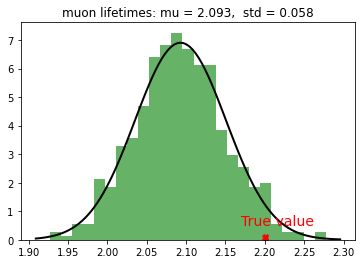

In [87]:
# Fit a normal distribution to the lifetime data:
mu, std = stats.norm.fit(taus)

# Plot the histogram
plt.hist(taus, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "muon lifetimes: mu = %.3f,  std = %.3f" % (mu, std)

#plot true val
plt.plot(2.2,0.1,'Xr')
plt.annotate("True value", (2.17, 0.5),color='red',size=14);

plt.title(title)

plt.show()

In [52]:
#fitting histogram to gaussian
m,d = stats.norm.fit(taus, loc=0, scale=1) 
print('mean and standard deviation are', m, 'and', d,'respectively')

mean and standard deviation are 2.092891004228909 and 0.05775707655272924 respectively


COMMENTS: The estimated value of the muon lifetime after of 500 experiment repeats of 1000 data points is `2.092891004228909`. This value is less than the true value, 2.2. This is because we cut the lifetimes off at 10 microseconds, and thus give the sample shorter lifetimes than what would be true of all muons. If we change the range maximum from 10 to 20 microseconds, the mean value is `2.199566554751236`, much closer to the mean value of 2.2. This code is shown below and is called `tau_est2()`:

In [35]:
def tau_est2():
    t = []
    i=0
    while i < 1000:
        rand = np.random.exponential(scale=2.2)
        if rand <= 20: #changed to 20
            t.append(rand)
            i+=1
    tau_est = np.mean(t)
    return tau_est

In [36]:
i = 0
taus2 = []
while i < 500:
    taus2.append(tau_est2())
    i += 1

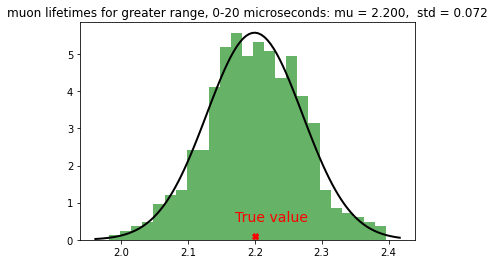

In [88]:
# Fit a normal distribution to the data:
mu, std = stats.norm.fit(taus2)

# Plot the histogram.
plt.hist(taus2, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "muon lifetimes for greater range, 0-20 microseconds: mu = %.3f,  std = %.3f" % (mu, std)

#plot true val
plt.plot(2.2,0.1,'Xr')
plt.annotate("True value", (2.17, 0.5),color='red',size=14);

plt.title(title)

plt.show()

In [89]:
#calculate estimated lifetimes for longer range of time distrubutions
np.mean(taus2)

2.199566554751236

As we can see, increasing muon lifetimes to 20 microseconds gives a predicted mean value of `2.199566554751236`

---

Q: How well (with what numerical precision) can you expect to estimate the true
lifetime from any single experiment ?

A: How well you can predict a single measurement is given by the standard deviation. The standard deviation is a measure of the amount of variation of a set of values from the mean. Therefore, the precision with which you can predict a value is some variation from the mean, the stdev. This is `0.05775707655272924` as given by the gaussian fit from `scipy.stats.norm`

---

Q: What is the bias? What is the precision on the bias?

A: The bias is the difference between the mean result generated by our data simulations and the actual result, the true muon lifetime, which is `0.10710899577109112
`. We can visualise the bias by plotting the histogram taking away the true value, and observing its shift from the value 0. As we can see, it is shifted to the left, as expected, as the predicted lifetime is lower than the true lifetime.

In [24]:
#calculate bias, true value minus the value we mean of the lifetimes we obtain from experiment
bias = np.abs(tau_true-np.mean(taus))
bias

0.10710899577109112

In [90]:
#generate a list of biases
tau_bias = np.array(taus)-tau_true

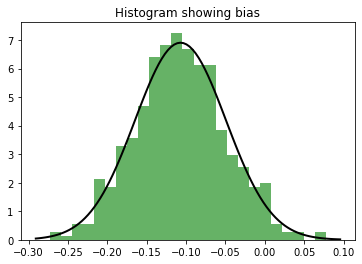

In [91]:
# Fit a normal distribution to the bias data:
mu, std = stats.norm.fit(tau_bias)

# Plot the histogram of bias
plt.hist(tau_bias, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Histogram showing bias"

plt.title(title)

plt.show()

A: The precision on the bias is the standard error on the mean, this is the standard deviation (precision) on the data set, divided by the square root of the number of values, 500.

In [92]:
#standard deviaiton over root (number of samples)
sterr = np.sqrt(np.mean(abs(taus-np.mean(taus))))**2/np.sqrt(500)

In [93]:
sterr

0.002049100270038916

The standard error on the mean (precision bias) is `0.002049100270038916`

## Adding background (stretch material)
---

Adapt your random generation to sample from a linear combination of two distributions:
    P(t) = X* P1(t) + (1-X)*P2(t))
    
where X is some fraction

In [39]:
X = 0.8
rand = X*np.random.exponential(scale=2.2) + (1-X)*np.random.normal()

In [40]:
def tau_bkgnd():
    t = []
    i=0
    X = 0.8
    while i < 1000:
        rand = X*np.random.exponential(scale=2.2) + (1-X)*np.random.normal()
        if rand <= 10:
            t.append(rand)
            i+=1
    tau_est = np.mean(t)
    return tau_est

In [41]:
i = 0
taus_bkgnd = []
while i < 500:
    taus_bkgnd.append(tau_bkgnd())
    i += 1

In [45]:
mean_bk, stdev_bk = stats.norm.fit(taus_bkgnd, loc=0, scale=1)

In [49]:
bias_bk = tau_true - mean_bk
print('bias:',bias_bk, 'standard deviation:',stdev_bk)

bias: 0.47350291298428937 standard deviation: 0.052819204334773884


The bias, when adding background, is the difference between the true value and the mean, `bias_bk`, `0.47350291298428937`

The precision on a single measurement is the standard deviation: `stdev_bk`, `0.052819204334773884`